In [2]:
from sklearn.cluster import KMeans
from kneed import KneeLocator
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

In [45]:
# 1) Transforme a imagem em um dataset

imagem = Image.open("halteres.jpg")
imagem_array = np.array(imagem)
print("Shape da imagem array:", imagem_array.shape)

Shape da imagem array: (225, 300, 3)


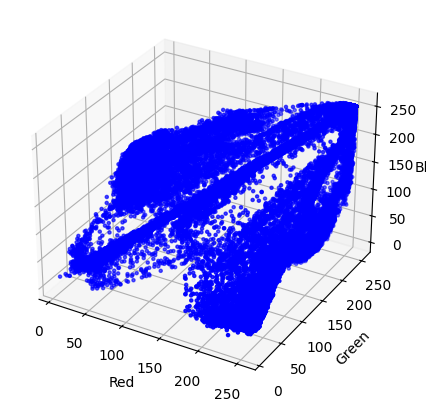

In [46]:
# 2) Plotar imagem 3D do dataset, apresentando a distribuição dos píxeis

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection='3d')

r = imagem_array[:, :, 0].flatten()
g = imagem_array[:, :, 1].flatten()
b = imagem_array[:, :, 2].flatten()

ax.scatter(r, g, b, c='b', marker='.')
ax.set_xlabel('Red')
ax.set_ylabel('Green')
ax.set_zlabel('Blue')
plt.show()

Número de clusters: 3


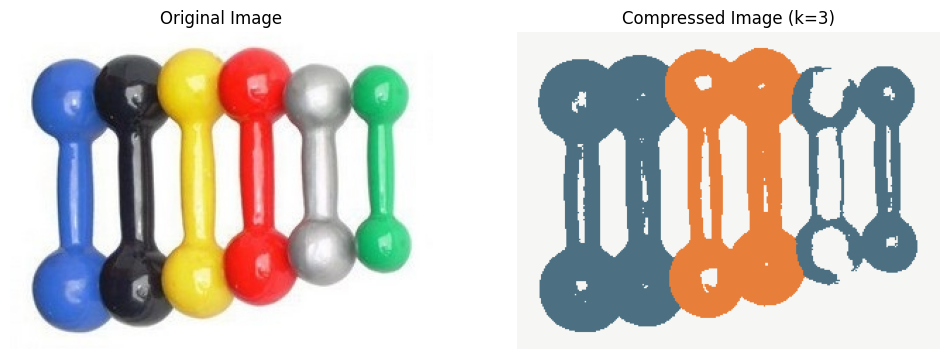

In [47]:
def find_optimal_k(data):
    distortions = []
    for i in range(1, 11):
        kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
        kmeans.fit(data)
        distortions.append(kmeans.inertia_)
    kn = KneeLocator(range(1, 11), distortions, curve='convex', direction='decreasing')
    return kn.elbow

def cluster_and_show_image(image_path, k_clusters):
    # Load image
    image = Image.open(image_path)
    imagem_array = np.array(image)
    
    # Reshape image array
    data = imagem_array.reshape(-1, 3)
    
    # Perform KMeans clustering
    kmeans = KMeans(n_clusters=k_clusters, random_state=42)
    kmeans.fit(data)
    labels = kmeans.predict(data)
    centroids = kmeans.cluster_centers_
    compressed_image = centroids[labels].reshape(imagem_array.shape).astype(np.uint8)
    
    # Display original and compressed images
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    
    ax[0].imshow(imagem_array)
    ax[0].set_title('Original Image')
    ax[0].axis('off')
    
    ax[1].imshow(compressed_image)
    ax[1].set_title(f'Compressed Image (k={k_clusters})')
    ax[1].axis('off')
    
    plt.show()

# Encontre o número ideal de clusters (k) usando o método de Elbow
imagem_array = np.array(Image.open("halteres.jpg"))
k = find_optimal_k(imagem_array.reshape(-1, 3))
print("Número de clusters:", k)

# kmeans
cluster_and_show_image("halteres.jpg", k)

In [58]:
import numpy as np
import cv2

# Defina as classes
classes = {
    0: "haltere1-Azul",
    1: "haltere2-Preto",
    2: "haltere3-Amarelo",
    3: "haltere4-Vermelho",
    4: "haltere5-Cinza",
    5: "haltere6-Verde",
    6: "fundo"
}

# Função de callback para o evento on_mouse
def on_mouse(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN:
        global pixels, samples
        (B, G, R) = img[y, x]
        p = np.array([[B, G, R, param]])
        pixels = np.concatenate((pixels, p))
        print("Amostra {}: {},{},{}".format(samples, B, G, R))
        samples += 1

# Carregue a imagem
img = cv2.imread("halteres.jpg")
cv2.namedWindow('halteres')
cv2.setMouseCallback("halteres", on_mouse)

# Nome do arquivo para salvar os dados
file = "dataset.csv"
open(file, 'w').close()

qtd_amos = 50

for classe in classes:
    samples = 0
    pixels = np.zeros((1, 4), dtype=np.int8)
    print("Amostras classe {}".format(classes[classe]))
    while True:
        cv2.imshow("halteres", img)
        cv2.waitKey(1)
        if samples >= qtd_amos:
            break
    print("Fim da amostra {}".format(classe))
    pixels = pixels[1:]
    
    csv_rows = (["{},{},{},{}\n".format(classe, j, k, l) for j, k, l, _ in pixels])
    csv_text = "".join(csv_rows)
    with open(file, 'a') as f:
        f.write(csv_text)

print("Fim da coleta de dados")
cv2.destroyAllWindows()

Amostras classe haltere1-Azul
Amostra 0: 202,116,80
Amostra 1: 242,163,136
Amostra 2: 246,175,142
Amostra 3: 254,174,143
Amostra 4: 214,127,95
Amostra 5: 255,173,141
Amostra 6: 212,107,58
Amostra 7: 202,100,47
Amostra 8: 202,100,47
Amostra 9: 199,108,69
Amostra 10: 221,119,76
Amostra 11: 221,119,76
Amostra 12: 240,166,140
Amostra 13: 238,178,156
Amostra 14: 236,199,177
Amostra 15: 236,199,177
Amostra 16: 230,189,164
Amostra 17: 230,173,152
Amostra 18: 198,96,48
Amostra 19: 191,94,50
Amostra 20: 200,102,60
Amostra 21: 210,110,68
Amostra 22: 214,114,72
Amostra 23: 216,116,74
Amostra 24: 214,118,78
Amostra 25: 227,137,96
Amostra 26: 237,162,124
Amostra 27: 178,89,39
Amostra 28: 152,82,45
Amostra 29: 170,89,52
Amostra 30: 177,96,59
Amostra 31: 181,102,63
Amostra 32: 199,106,57
Amostra 33: 207,113,67
Amostra 34: 250,182,159
Amostra 35: 226,139,99
Amostra 36: 212,113,63
Amostra 37: 210,113,63
Amostra 38: 202,109,60
Amostra 39: 253,176,143
Amostra 40: 228,147,110
Amostra 41: 222,123,79
Amostr

   Classe  Blue  Green  Red
0       0   202    116   80
1       0   242    163  136
2       0   246    175  142
3       0   254    174  143
4       0   214    127   95


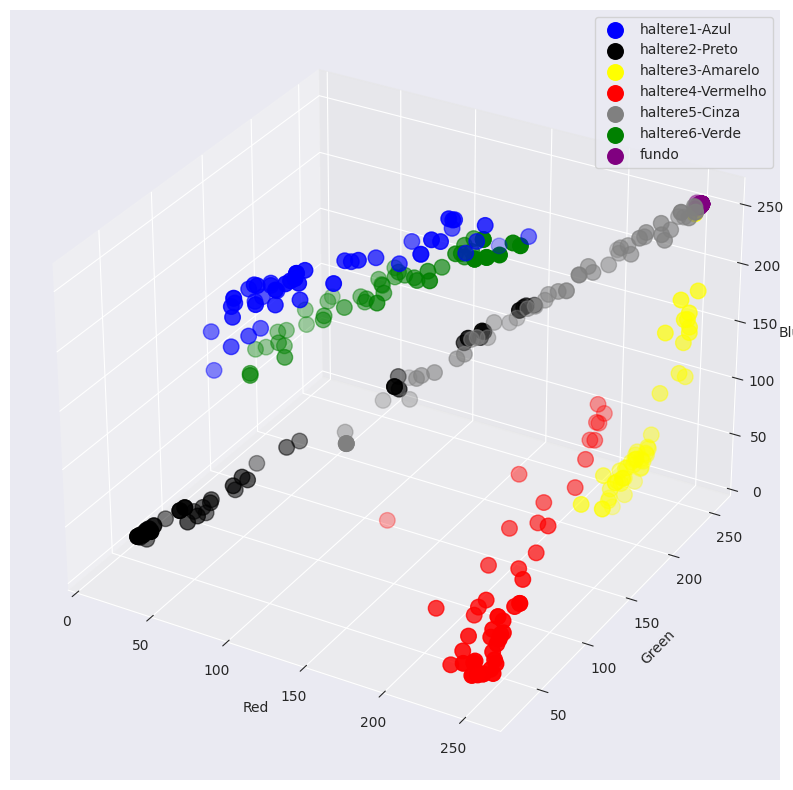

In [5]:
# Carregar os dados do arquivo
df = pd.read_csv('dataset.csv', header=None, names=['Classe', 'Blue', 'Green', 'Red'])
print(df.head())

# Definir classes e cores das classes
classes = {0: "haltere1-Azul", 1: "haltere2-Preto", 2: "haltere3-Amarelo", 3: "haltere4-Vermelho", 4: "haltere5-Cinza", 5: "haltere6-Verde", 6: "fundo"}
cores_classes = {
    0: "blue",
    1: "black",
    2: "yellow",
    3: "red",
    4: "gray",
    5: "green",
    6: "purple"
}

# Plotar a distribuição dos dados
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

for classe in classes:
    data = df[df['Classe'] == classe]
    cor = cores_classes[classe]
    ax.scatter(data['Red'], data['Green'], data['Blue'], label=classes[classe], marker='.', s=500, c=cor)
    
ax.set_xlabel('Red')
ax.set_ylabel('Green')
ax.set_zlabel('Blue')
plt.legend()
plt.show()


Relatório de Classificação - SVM
Acurácia: 0.97
F1-Score: 0.97


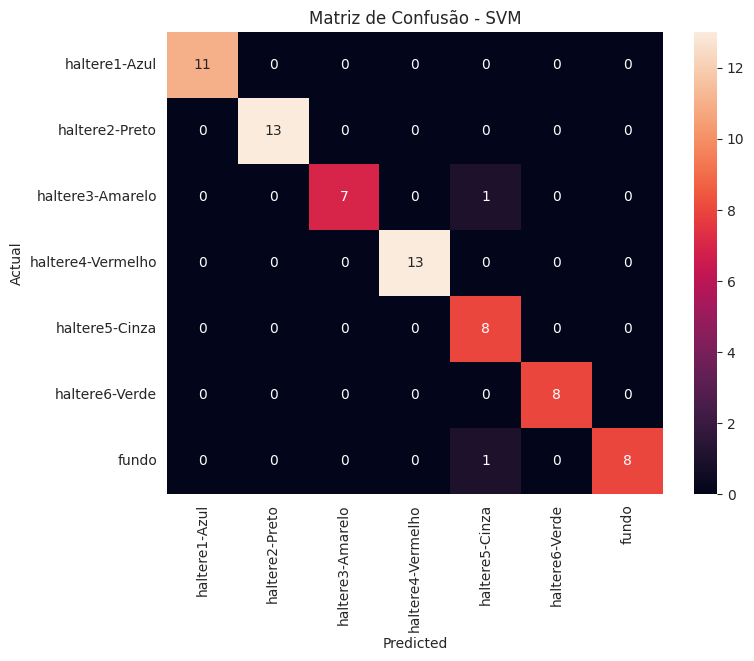

In [6]:
# Carregar os dados do arquivo
df = pd.read_csv('dataset.csv', header=None, names=['Classe', 'Blue', 'Green', 'Red'])

# Separar os dados em features (X) e rótulos (y)
X = df[['Blue', 'Green', 'Red']]
y = df['Classe']

# Dividir os dados em conjunto de treinamento e conjunto de teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinar o modelo SVM
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Prever os rótulos no conjunto de teste
svm_predictions = svm_model.predict(X_test)

# Calcular o reporte de classificação
print("Relatório de Classificação - SVM")
print("Acurácia: {:.2f}".format(accuracy_score(y_test, svm_predictions)))
print("F1-Score: {:.2f}".format(f1_score(y_test, svm_predictions, average='weighted')))
print()

# Gerar a matriz de confusão utilizando seaborn para visualização
svm_conf_matrix = confusion_matrix(y_test, svm_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(svm_conf_matrix, annot=True, fmt='d', xticklabels=classes.values(), yticklabels=classes.values())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusão - SVM')
plt.show()

Relatório de Classificação - MLP
Acurácia: 0.87
F1-Score: 0.83


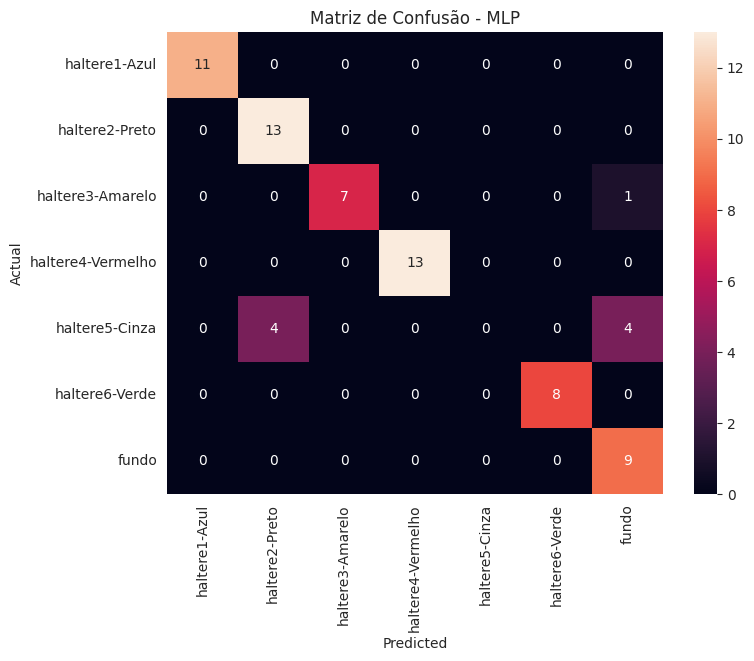

In [7]:
# Treinar o modelo MLP

mlp_model = MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=1000)
mlp_model.fit(X_train, y_train)

# Prever os rótulos no conjunto de teste
mlp_predictions = mlp_model.predict(X_test)

# Calcular o reporte de classificação
print("Relatório de Classificação - MLP")
print("Acurácia: {:.2f}".format(accuracy_score(y_test, mlp_predictions)))
print("F1-Score: {:.2f}".format(f1_score(y_test, mlp_predictions, average='weighted')))
print()

# Gerar a matriz de confusão utilizando seaborn para visualização
mlp_conf_matrix = confusion_matrix(y_test, mlp_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(mlp_conf_matrix, annot=True, fmt='d', xticklabels=classes.values(), yticklabels=classes.values())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusão - MLP')
plt.show()

/home/miguel/Documentos/UFV/PDI/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/miguel/Documentos/UFV/PDI/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Melhores parâmetros encontrados:
{'hidden_layer_sizes': (100,), 'learning_rate_init': 0.001}

Precisão do treinamento:
0.9107374361320827


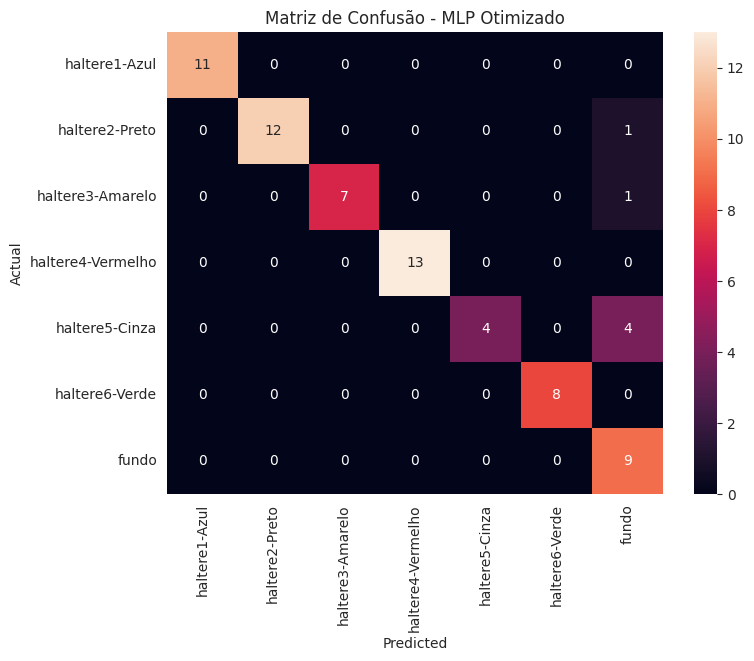

In [11]:
# Grid Search

# Definir as opções de camadas e taxas de aprendizado
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (200,), (50, 50), (100, 100)],
    'learning_rate_init': [0.001, 0.01]
}

# Inicializar o classificador MLP
mlp = MLPClassifier(max_iter=1000)

# Inicializar o objeto GridSearchCV
grid_search = GridSearchCV(mlp, param_grid, cv=3, scoring='accuracy')

# Realizar a busca de grade nos dados de treinamento
grid_search.fit(X_train, y_train)

# Melhores parâmetros encontrados
print("Melhores parâmetros encontrados:")
print(grid_search.best_params_)
print()

# Precisão do treinamento
print("Precisão do treinamento:")
print(grid_search.best_score_)
print()

# Previsões no conjunto de teste utilizando o modelo otimizado
predictions = grid_search.predict(X_test)

# Matriz de confusão Seaborn
conf_matrix = confusion_matrix(y_test, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=classes.values(), yticklabels=classes.values())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusão - MLP Otimizado')
plt.show()

In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm, metrics

# Carregar o conjunto de dados CIFAR-10 usando TensorFlow
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Reformular os dados para 2D para preparação para o pré-processamento
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Pré-processamento: escalar os recursos para média zero e variância unitária
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_flat)
X_test_scaled = scaler.transform(X_test_flat)

# Inicializar o classificador SVM
svm_classifier = svm.SVC(kernel='linear')

# Treinar o classificador SVM
svm_classifier.fit(X_train_scaled, y_train)

# Prever os rótulos dos dados de teste
y_pred = svm_classifier.predict(X_test_scaled)

# Avaliar o desempenho do modelo
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred, average='macro')
recall = metrics.recall_score(y_test, y_pred, average='macro')
f1_score = metrics.f1_score(y_test, y_pred, average='macro')

# Imprimir métricas de desempenho
print("Acurácia:", accuracy)
print("Precisão:", precision)
print("Revocação:", recall)
print("Pontuação F1:", f1_score)
